# Exercise 4.9: Intro to Data Visualization with Python Part 2
# Contents
## 1. Import libraries&data sets
## 2. You need to provide the Instacart senior stakeholders with descriptive findings about sales. 
## 3. The marketing team is curious about the distribution of orders among customers in terms of loyalty.
## 4. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
## 5. Exploratory analysis 
## 6. You’ll also need to explore whether there’s a connection between age and spending power (income).


## 1. Import libraries&data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create project folder path
path=r'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/11-2024 Instacart Basket Analysis'

In [5]:
path

'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/11-2024 Instacart Basket Analysis'

In [7]:
# Import "orders_products_all.pkl"
ords_prods_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [9]:
# Check the output
ords_prods_all.head()

,order_id,user_id,customers_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. You need to provide the Instacart senior stakeholders with descriptive findings about sales. 
### Create a histogram of the “order_hour_of_day” column.
### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

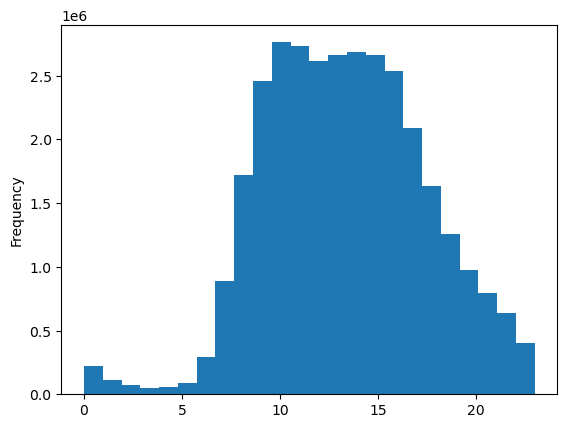

In [11]:
# Create a histogram of the "order_hour_of_day" column
hist_order_hod=ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram shows peaks during certain hours between 9 AM and 5 PM, which would indicate the times of day when the most orders are placed. 

In [12]:
# Export a histogramm
hist_order_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

## 3. The marketing team is curious about the distribution of orders among customers in terms of loyalty. 
### Create a bar chart from the “loyalty_flag” column

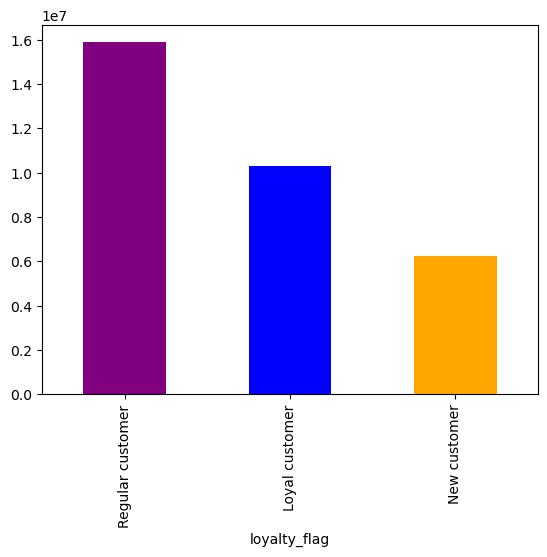

In [15]:
# Creating a bar chart from the "loyalty_flag" column.
bar_loyalty_flag=ords_prods_all['loyalty_flag'].value_counts().plot.bar(color=['purple', 'blue', 'orange'])

In [17]:
# Export the var chart "loyalty_flag"
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## 4. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
### Hint: To check this, you need to use an accurate sample for your line chart!

In [19]:
# Create an accurate sample
# 1.  Create a random sample by generating a seed
np.random.seed(4)

In [21]:
# Create an accurate sample
# 2. Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [23]:
# Create an accurate sample
# 3. Split the dataframe into two samples
big = ords_prods_all[dev]
small = ords_prods_all[~dev]

In [24]:
# Check the result
len(ords_prods_all)

32404859

In [25]:
len(big)+len(small)

32404859

In [29]:
# Reduce the samples to only the columns needed
sample_chart = small [['order_hour_of_day','prices']]

In [31]:
# Check the result
sample_chart.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


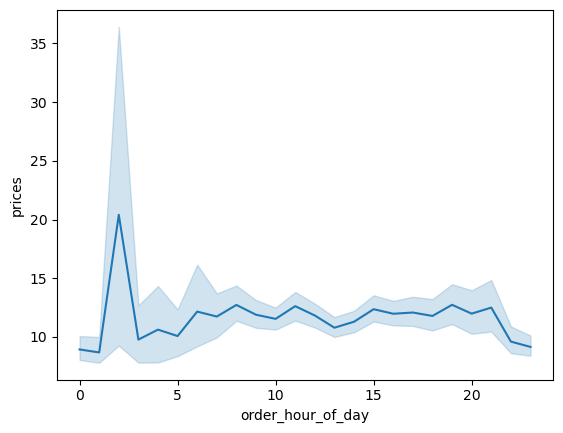

In [33]:
# Create a line chart with "prices" & "hour_of_the_day"
line_prices_hod = sns.lineplot(data = sample_chart, x = 'order_hour_of_day',y = 'prices')

In [35]:
# Export a line chart
line_prices_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_prices_orders_hod.png'))

## 5. Exploratory analysis 
### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 
### First, determine whether there’s a connection between age and family situation by creating a line chart 
### exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows. 

In [39]:
# Reduce previously made sample to needed columns
sample_chart_2 = small [['age','number_of_dependants']]

In [44]:
# Check if the subset of the sample was made properly
sample_chart_2.tail()

,age,number_of_dependants
32404841,74,3
32404842,74,3
32404843,74,3
32404849,74,3
32404850,74,3


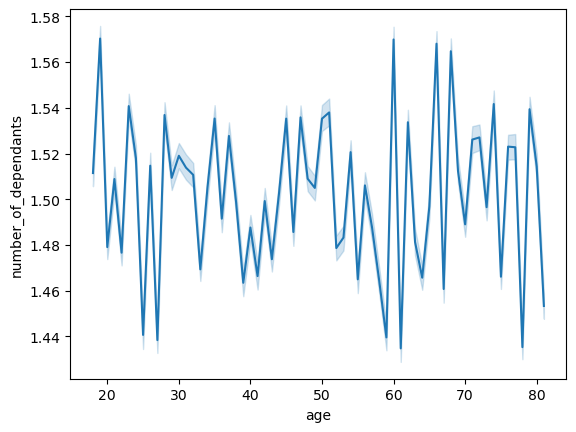

In [43]:
# Create a line chart 
line_age_dependants = sns.lineplot(data = sample_chart_2, x = 'age',y = 'number_of_dependants')

### No clear paterns identified indicating strong relationship between age and dependants,

In [62]:
# Export a line chart
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

## 6. You’ll also need to explore whether there’s a connection between age and spending power (income). 
### To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [49]:
# Adjust previously made sample to needed columns
sample_chart_3 = small [['age','income']]

In [51]:
# Check if the subset of the sample was made properly
sample_chart_3.tail()

,age,income
32404841,74,137969
32404842,74,137969
32404843,74,137969
32404849,74,137969
32404850,74,137969


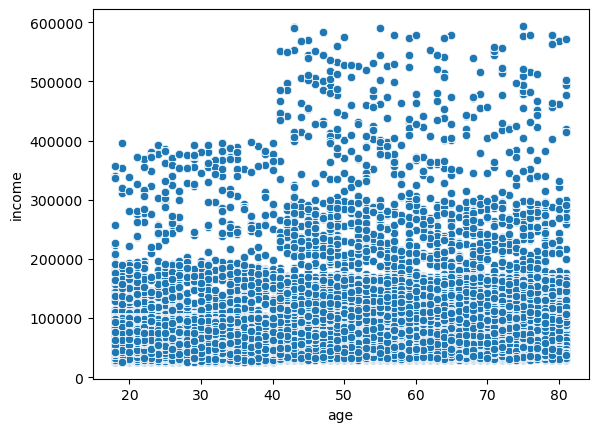

In [55]:
# Create a scatterplot "age" vs. "income"
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = sample_chart_3)

### Most customers have incomes concentrated below 200,000.
### There is a smaller group of customers with significantly higher incomes, extending up to 600,000.
### The ages of customers span from approximately 20 to 80 years.
### There is a relatively even spread of customers across this age range.
### Customers with lower incomes are densely clustered across all age groups.
### Higher incomes appear more scattered and less frequent, but they are spread across all age ranges.
### No strong correlation is visible between age and income — high-income customers exist across all ages.
### The scatterplot suggests income variability is high across all ages.
### A large segment of customers, regardless of age, falls into the low-to-moderate income range (below 200,000).
### In summary, while there is no clear linear relationship between age and income, the majority of customers are lower-income earners, with a smaller subset exhibiting higher income levels across all age groups.

In [64]:
# Export the scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))